In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
a = torch.rand(3,3)

In [3]:
a

tensor([[0.1486, 0.7713, 0.7365],
        [0.1656, 0.8682, 0.9874],
        [0.7407, 0.6741, 0.0785]])

In [4]:
a = torch.rand(3,3)
mask = torch.zeros(3, 1)

In [5]:
x = torch.arange(0, 100, 10, dtype=torch.float32)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [6]:
mean = torch.max(x)
mean

tensor(90.)

In [7]:
print((x == mean).nonzero(as_tuple=True)[0])

tensor([9])


In [8]:
x = torch.arange(0., 10.)

x, x.shape

(tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([10]))

In [9]:
x_reshaped = x.reshape(10, 1, 1)
x_reshaped, x_reshaped.shape

(tensor([[[0.]],
 
         [[1.]],
 
         [[2.]],
 
         [[3.]],
 
         [[4.]],
 
         [[5.]],
 
         [[6.]],
 
         [[7.]],
 
         [[8.]],
 
         [[9.]]]),
 torch.Size([10, 1, 1]))

In [10]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
z = x.view(10,1)
z[1, 0] = 10

In [12]:
x

tensor([ 0., 10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [13]:
x = torch.arange(0., 10.)
y = torch.arange(10., 20.)

In [14]:
x = torch.unsqueeze(x, 0)
x

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [15]:
x_squeezed = torch.squeeze(x)
x_squeezed

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
x = torch.arange(0, 3*3*3)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])

In [17]:
x = x.reshape(3,3,3)

In [18]:
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [19]:
x = x.permute(2,1,0)
x

tensor([[[ 0,  9, 18],
         [ 3, 12, 21],
         [ 6, 15, 24]],

        [[ 1, 10, 19],
         [ 4, 13, 22],
         [ 7, 16, 25]],

        [[ 2, 11, 20],
         [ 5, 14, 23],
         [ 8, 17, 26]]])

In [20]:
torch.__version__

'2.2.1'

In [21]:
weights = 0.7
biases = 0.3

X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weights * X + biases


In [22]:
train_split = int(0.8 * len(X))
train_split

80

In [23]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [24]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions", s=4)

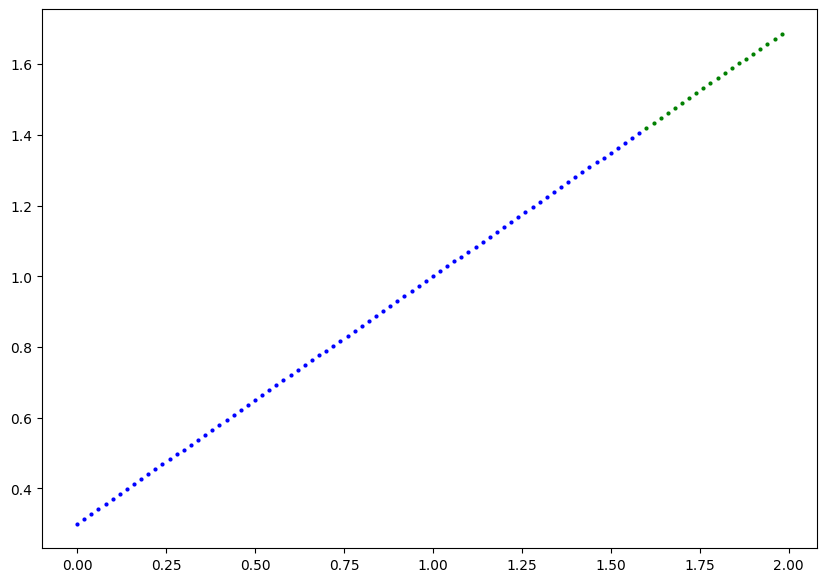

In [25]:
plot_predictions()

In [26]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [27]:
lrm = LinearRegressionModel()


torch.Size([20, 1])
torch.Size([20, 1])


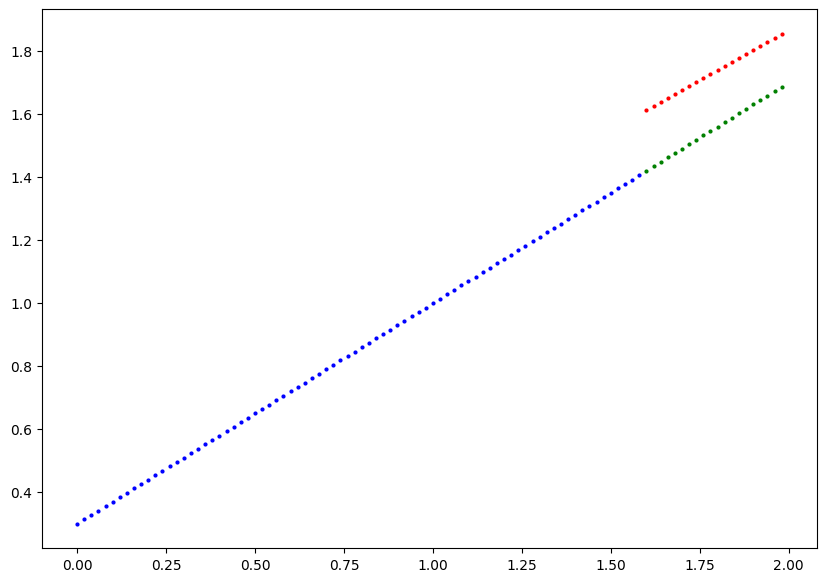

In [28]:

print(X_test.shape)
with torch.inference_mode():
    y_pred = lrm(X_test)
print(y_pred.shape)

plot_predictions(predictions=y_pred)



In [29]:
MAE_loss = torch.mean(torch.abs(y_pred - y_test))
MAE_loss

loss_fn = torch.nn.L1Loss()

In [30]:
optimizer = torch.optim.SGD(params=lrm.parameters(),
                            lr=0.001)

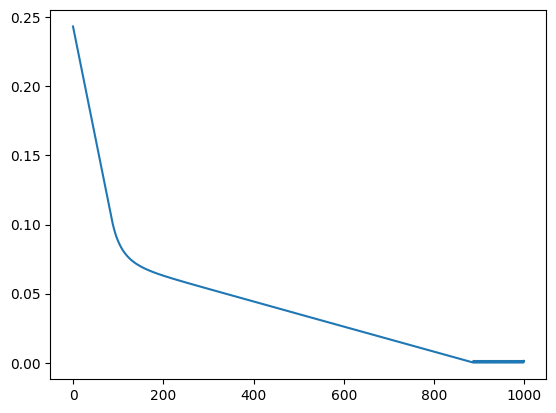

In [31]:
epochs = 1000

epoch_count = []
loss_values = []

for epoch in range(epochs):
    epoch_count.append(epoch)
    lrm.train()
    #1
    y_pred = lrm(X_train)
    #2
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)
    #3
    optimizer.zero_grad()
    #4
    loss.backward()
    #5
    optimizer.step()
    lrm.eval()
with torch.no_grad():
    plt.plot(epoch_count, loss_values, label="Train loss")

In [32]:
lrm.weights

Parameter containing:
tensor([0.6998], requires_grad=True)

In [33]:
lrm.bias

Parameter containing:
tensor([0.3004], requires_grad=True)

In [34]:
with torch.inference_mode():
    y_pred = lrm(X_test)

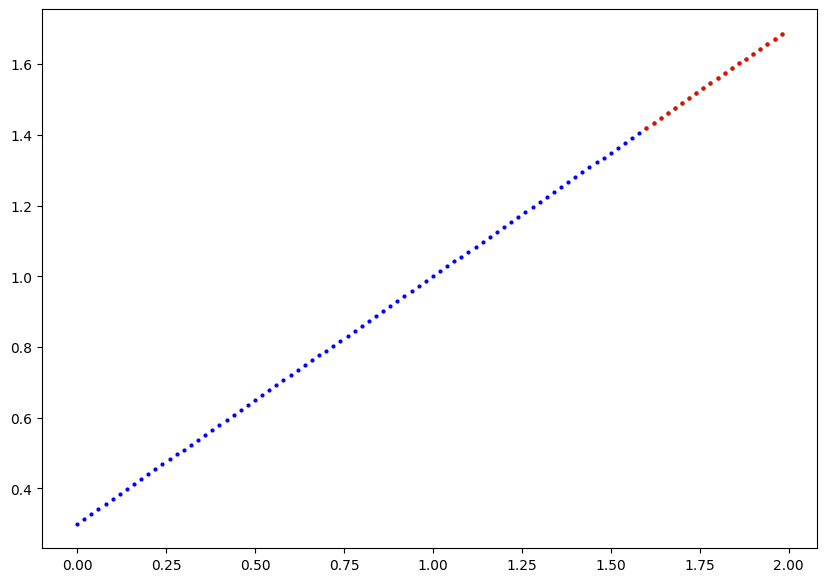

In [35]:
plot_predictions(predictions=y_pred)


In [36]:
torch.save(lrm.state_dict(), "./torch/model.pth")

In [37]:
import os
os.mkdir("torch")

FileExistsError: [Errno 17] File exists: 'torch'

In [39]:
model = torch.load("./torch/model.pth")
lrm = LinearRegressionModel()

In [40]:
model = lrm.load_state_dict(torch.load("./torch/model.pth"))

In [41]:
model


<All keys matched successfully>

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [43]:
true_weight = 0.6942
true_bias = 2

X = torch.arange(0, 100, 0.01)
Y = true_weight * X + true_bias


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        

In [44]:
split_pivot = int(0.8 * len(X))
X_train, y_train = X[:split_pivot], Y[:split_pivot]
X_test, y_test = X[split_pivot:], Y[split_pivot:]
print(X_train.shape)
print(X_test.shape)

torch.Size([8000])
torch.Size([2000])


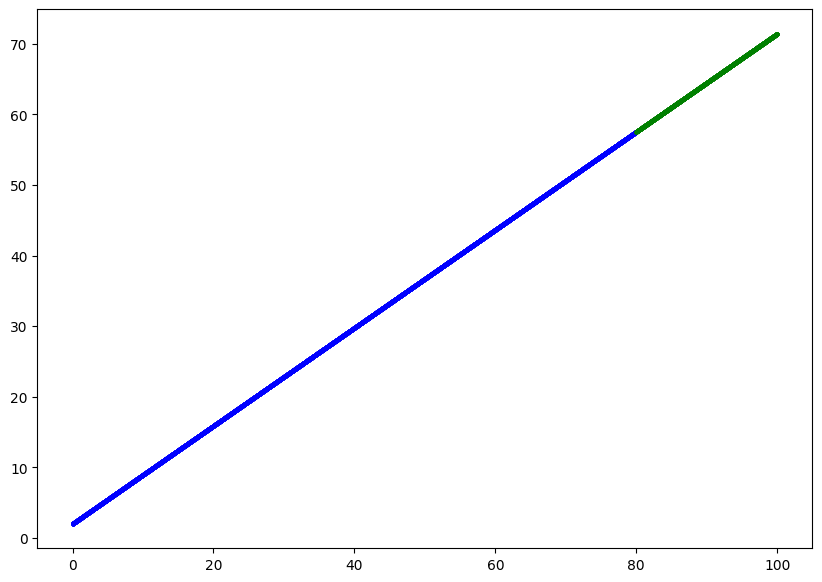

In [45]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions", s=4)
        
plot_predictions()

In [46]:
model = LinearRegressionModel()
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [47]:
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
for epoch in range(epochs):

    model.train()
    
    optimizer.zero_grad()
    
    outputs = model(X_train)

    loss = loss_fn(outputs, y_train)
    print(loss)
    loss.backward()

    optimizer.step()


tensor(3.7868, grad_fn=<MeanBackward0>)
tensor(3.6418, grad_fn=<MeanBackward0>)
tensor(3.4977, grad_fn=<MeanBackward0>)
tensor(3.3546, grad_fn=<MeanBackward0>)
tensor(3.2126, grad_fn=<MeanBackward0>)
tensor(3.0717, grad_fn=<MeanBackward0>)
tensor(2.9322, grad_fn=<MeanBackward0>)
tensor(2.7942, grad_fn=<MeanBackward0>)
tensor(2.6577, grad_fn=<MeanBackward0>)
tensor(2.5230, grad_fn=<MeanBackward0>)


In [48]:
print(model.weights)

Parameter containing:
tensor([0.7848], requires_grad=True)


In [49]:
print(model.bias)

Parameter containing:
tensor([0.4259], requires_grad=True)


torch.Size([2000])


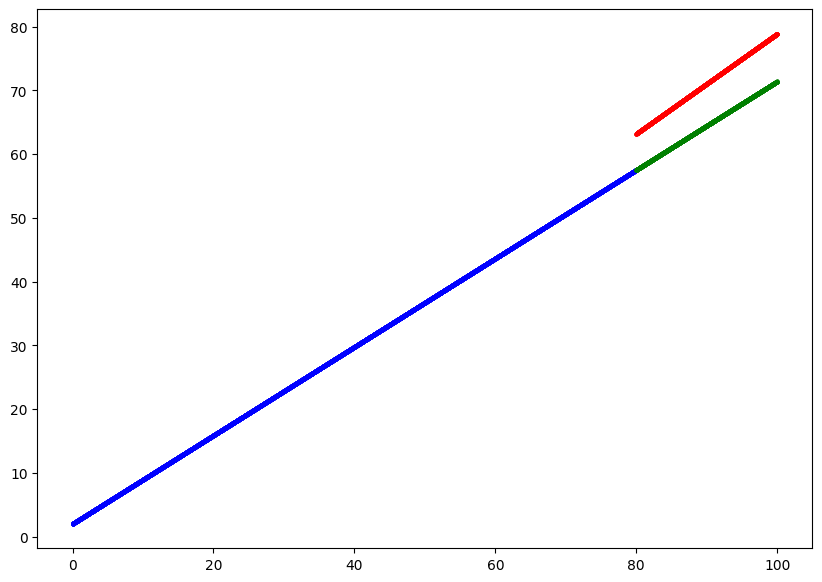

In [50]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
print(y_pred.shape)
plot_predictions(predictions=y_pred)

In [51]:
torch.save(model.state_dict(), "torch/model2.pth")

In [52]:
loaded_model = torch.load("torch/model2.pth")

In [53]:
loaded_model

OrderedDict([('weights', tensor([0.7848])), ('bias', tensor([0.4259]))])

In [54]:
new_model = LinearRegressionModel()
new_model.load_state_dict(loaded_model)

<All keys matched successfully>

In [55]:
new_model.eval()
with torch.inference_mode():
    new_model_preds = new_model(X_test)

y_pred == new_model_preds

tensor([True, True, True,  ..., True, True, True])

In [56]:
anagram = sorted(["g", "f", "k"])

In [57]:
anagram


['f', 'g', 'k']